# QUESTIONS

Code Implementation Task

In [1]:
# Our Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#df = pd.read_csv('task.csv')

In [3]:
# Our dataset
df = pd.read_csv('https://bit.ly/3hKIspT')

In [5]:
# our first 11 rows
df.head(11)

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,NaN,Sputnik V
1,Argentina,12/30/2020,15656.0,Sputnik V
2,Argentina,12/31/2020,15656.0,Sputnik V
3,Argentina,1/1/2021,11070.0,Sputnik V
4,Argentina,1/2/2021,8776.0,Sputnik V
5,Argentina,1/3/2021,7400.0,Sputnik V
6,Argentina,1/4/2021,6483.0,Sputnik V
7,Argentina,1/5/2021,7984.0,Sputnik V
8,Argentina,1/6/2021,8173.0,Sputnik V
9,Argentina,1/7/2021,8363.0,Sputnik V


In [6]:
# some statistical results of dataset
df.describe()

,daily_vaccinations
count,1.442000e+03
mean,4.334959e+04
std,1.165367e+05
min,1.000000e+00
25%,1.659750e+03
50%,5.567000e+03
75%,2.797975e+04
max,1.126251e+06


In [7]:
# null values. If it is true then value is null
df.isnull()

,country,date,daily_vaccinations,vaccines
0,False,False,True,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1497,False,False,False,False
1498,False,False,False,False
1499,False,False,False,False
1500,False,False,False,False


In [9]:
# the number of null_values
df.isnull().sum()
# we have 60 null values of daily_vaccinations' column

country                0
date                   0
daily_vaccinations    60
vaccines               0
dtype: int64

In [10]:
df.info() # database info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             1502 non-null   object 
 1   date                1502 non-null   object 
 2   daily_vaccinations  1442 non-null   float64
 3   vaccines            1502 non-null   object 
dtypes: float64(1), object(3)
memory usage: 47.1+ KB


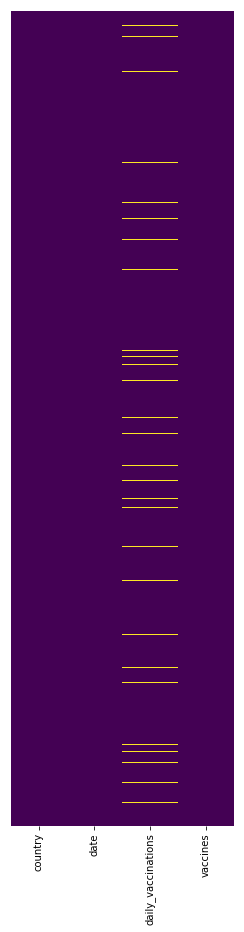

In [13]:
#distribution of null values
# yelllow ones are nulls

plt.figure(figsize=(4, 15))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

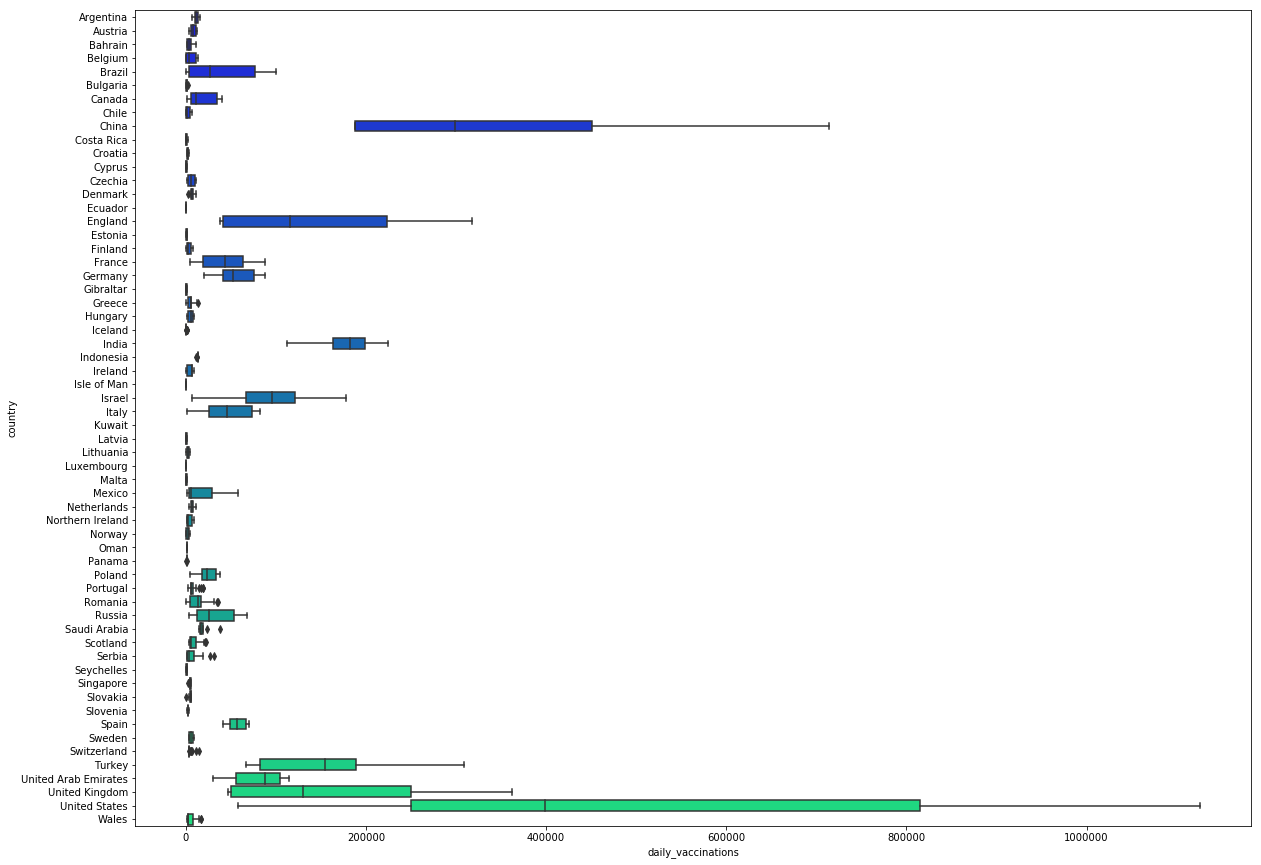

In [14]:
#distribution of null values over country

plt.figure(figsize=(20, 15))
sns.boxplot(x='daily_vaccinations',y='country',data=df,palette='winter')

# hard to detect

In [15]:
# min daily_vaccinations of each country
df.groupby('country')['daily_vaccinations'].min()

country
Argentina                 6483.0
Austria                   3368.0
Bahrain                    943.0
Belgium                      1.0
Brazil                     112.0
Bulgaria                   472.0
Canada                     866.0
Chile                       51.0
China                   187500.0
Costa Rica                 240.0
Croatia                    989.0
Cyprus                     534.0
Czechia                   1822.0
Denmark                   1994.0
Ecuador                    108.0
England                  37625.0
Estonia                    309.0
Finland                    459.0
France                    5000.0
Germany                  19721.0
Gibraltar                  520.0
Greece                     549.0
Hungary                   1339.0
Iceland                     63.0
India                   112150.0
Indonesia                11823.0
Ireland                    550.0
Isle of Man                 90.0
Israel                    6887.0
Italy                      926.0
Ku

In [17]:
df.index[df.isnull().any(axis=1)] # index of null values

Int64Index([   0,   28,   48,   77,  103,  113,  141,  184,  217,  254,  280,
             307,  324,  354,  384,  386,  422,  451,  477,  499,  528,  543,
             572,  600,  627,  638,  652,  677,  682,  720,  750,  751,  780,
             812,  838,  866,  899,  916,  959,  988, 1016, 1022, 1050, 1079,
            1108, 1138, 1150, 1193, 1211, 1226, 1238, 1256, 1278, 1300, 1322,
            1352, 1365, 1386, 1422, 1459],
           dtype='int64')

In [18]:
df.iloc[627] # example of 627's row. This is India and it's daily_vaccinations value is NaN

country                             India
date                            1/15/2021
daily_vaccinations                    NaN
vaccines              Covaxin, Covishield
Name: 627, dtype: object

# QUESTION 1 STARTS HERE

# Implement code to fill the missing data (impute)  in daily_vaccinations column per country with the minimum daily vaccination number of relevant countries.

In [21]:
# Fill the NaN values of min. of daily_vaccinations of each country
df["daily_vaccinations"] = df.groupby('country')['daily_vaccinations'].transform(lambda x: x.fillna(x.min()))

In [22]:
# Our new imputed version of dataset.
df

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,6483.0,Sputnik V
1,Argentina,12/30/2020,15656.0,Sputnik V
2,Argentina,12/31/2020,15656.0,Sputnik V
3,Argentina,1/1/2021,11070.0,Sputnik V
4,Argentina,1/2/2021,8776.0,Sputnik V
...,...,...,...,...
1497,Wales,1/20/2021,11105.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1498,Wales,1/21/2021,12318.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1499,Wales,1/22/2021,15148.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1500,Wales,1/23/2021,17371.0,"Oxford/AstraZeneca, Pfizer/BioNTech"


In [25]:
# We saw the india Nan value and we check again.

df.iloc[627] # min india = 112150.0

country                             India
date                            1/15/2021
daily_vaccinations               112150.0
vaccines              Covaxin, Covishield
Name: 627, dtype: object

In [28]:
df.isnull().sum() # still one NaN value

country               0
date                  0
daily_vaccinations    1
vaccines              0
dtype: int64

In [30]:
df.index[df.isnull().any(axis=1)] # index is 750

Int64Index([750], dtype='int64')

In [31]:
df.iloc[750] # kuwait

country                        Kuwait
date                       12/28/2020
daily_vaccinations                NaN
vaccines              Pfizer/BioNTech
Name: 750, dtype: object

In [239]:
# So kuwait has no value. So we need to assign '0'

In [33]:
df = df.fillna(value=0) # assign to zero to kuwait

In [35]:
df.isnull().sum() # no nan values

country               0
date                  0
daily_vaccinations    0
vaccines              0
dtype: int64

In [37]:
df.iloc[750] # kuwait is zero

country                        Kuwait
date                       12/28/2020
daily_vaccinations                0.0
vaccines              Pfizer/BioNTech
Name: 750, dtype: object

In [38]:
df # our dataset is like this.

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,6483.0,Sputnik V
1,Argentina,12/30/2020,15656.0,Sputnik V
2,Argentina,12/31/2020,15656.0,Sputnik V
3,Argentina,1/1/2021,11070.0,Sputnik V
4,Argentina,1/2/2021,8776.0,Sputnik V
...,...,...,...,...
1497,Wales,1/20/2021,11105.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1498,Wales,1/21/2021,12318.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1499,Wales,1/22/2021,15148.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1500,Wales,1/23/2021,17371.0,"Oxford/AstraZeneca, Pfizer/BioNTech"


-------------------------------------------------------------

# QUESTION 2 STARTS HERE

# Implement code to list the top-3 countries with highest median daily vaccination numbers by considering missing values imputed version of dataset.

In [41]:
df.groupby('country')['daily_vaccinations'].max().sort_values(ascending=False).head(3) 
## highest daily vaccination numbers

country
United States     1126251.0
China              714286.0
United Kingdom     362307.0
Name: daily_vaccinations, dtype: float64

In [42]:
df.groupby('country')['daily_vaccinations'].median().sort_values(ascending=False).head(3) 
## highest median daily vaccination numbers
## Question 5

country
United States    378253.0
China            276786.0
India            173922.0
Name: daily_vaccinations, dtype: float64

# QUESTION 3 STARTS HERE

# What is the number of total vaccinations done on 1/6/2021 (MM/DD/YYYY) by considering missing values imputed version of dataset.

In [43]:
df # our imputed version of dataset

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,6483.0,Sputnik V
1,Argentina,12/30/2020,15656.0,Sputnik V
2,Argentina,12/31/2020,15656.0,Sputnik V
3,Argentina,1/1/2021,11070.0,Sputnik V
4,Argentina,1/2/2021,8776.0,Sputnik V
...,...,...,...,...
1497,Wales,1/20/2021,11105.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1498,Wales,1/21/2021,12318.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1499,Wales,1/22/2021,15148.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1500,Wales,1/23/2021,17371.0,"Oxford/AstraZeneca, Pfizer/BioNTech"


In [44]:
df_date = df.loc[df['date'] == '1/6/2021'] # 1/6/2021
df_date

,country,date,daily_vaccinations,vaccines
8,Argentina,1/6/2021,8173.0,Sputnik V
29,Austria,1/6/2021,3368.0,Pfizer/BioNTech
62,Bahrain,1/6/2021,1594.0,"Pfizer/BioNTech, Sinopharm"
86,Belgium,1/6/2021,736.0,Pfizer/BioNTech
121,Bulgaria,1/6/2021,472.0,"Moderna, Pfizer/BioNTech"
164,Canada,1/6/2021,14887.0,"Moderna, Pfizer/BioNTech"
197,Chile,1/6/2021,272.0,Pfizer/BioNTech
239,China,1/6/2021,455357.0,"CNBG, Sinovac"
267,Costa Rica,1/6/2021,763.0,Pfizer/BioNTech
287,Croatia,1/6/2021,1334.0,Pfizer/BioNTech


In [46]:
df_date['daily_vaccinations'].sum() # Total Vaccination number of 1/6/2021

1485255.0